## First Neural Network

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Set Random Seed
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
# Create Random Data
rand_a = np.random.uniform(0,100,(5,5))

In [4]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [5]:
rand_b = np.random.uniform(0,100,(5,1))

In [6]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [7]:
# Create Placeholders

# Weight
w = tf.placeholder(tf.float32)

# Bias
b = tf.placeholder(tf.float32)

In [13]:
# Operations

# Addition
add_op = w + b

In [14]:
# Multiplication
mul_op = w * b

In [16]:
# Run Operations in Tensorflow Session
with tf.Session() as sess:
    # Pass in values for "w" and "b" using "feed_dict={}"
    add_result = sess.run(add_op,feed_dict={w:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    multiply_result = sess.run(mul_op,feed_dict={w:rand_a,b:rand_b})
    print(multiply_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


## Example Neural Network

In [17]:
# Number of Features
num_features = 10

# Number of Neurons in Hidden Layer
hidden_layer = 3

In [18]:
# Placeholder
# Rows: Num Samples
# Cols: Num Features
# Rows left to None as it depends on batch size i.e. how many samples come under a batch size defined
x = tf.placeholder(tf.float32, shape=(None,num_features))

In [19]:
# Variables

# Weight
w = tf.Variable(tf.random_normal(shape=[num_features,hidden_layer]))

# Bias 
b = tf.Variable(tf.ones(shape=([hidden_layer])))

In [20]:
# Multiplication Operation
XW = tf.matmul(x,w)

In [22]:
# Addition Operation
z = tf.add(XW,b)

In [23]:
# Activation Function
a = tf.sigmoid(z)

In [24]:
init = tf.global_variables_initializer()

In [26]:
with tf.Session() as sess:
    sess.run(init)
    y_hat = sess.run(a,feed_dict={x:np.random.random([1,num_features])})
    print(y_hat)

[[ 0.96510035  0.27201718  0.86977303]]


## Simple Regression Example

In [27]:
# Input Data
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [28]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [29]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [30]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

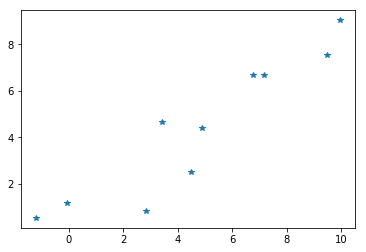

In [34]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [36]:
np.random.rand(2)

array([ 0.94926413,  0.47816742])

In [37]:
# Weight
m = tf.Variable(0.94)

# Bias
b = tf.Variable(0.47)

In [43]:
# Cost Function
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    # Squared Error
    error += (y - y_hat)**2

In [44]:
# Optimizer
# Define the Gradient Descent Optimizer with a Learning Rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# Optimizer has to try to Minimize the Squared Error
train = optimizer.minimize(error)

In [45]:
init = tf.global_variables_initializer()

In [50]:
# Create a Tensorflow Session
with tf.Session() as sess:
    # Run Variables Initializer
    sess.run(init)
    
    # Define Number of Training Steps
    training_steps = 5
    
    # Run the Gradient Descent Optimizer for Training Steps
    for i in range(training_steps):
        err = sess.run(train)
        
    # Fetch the final value of "Weight" and "Bias"
    final_slope, final_intercept = sess.run([m,b])

Error:  None
Error:  None
Error:  None
Error:  None
Error:  None


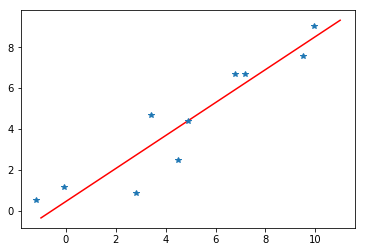

In [51]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')